In [4]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth',40)           # To display all the data in each column
pd.options.display.max_columns= 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')   

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

**Reading Facebook Data csv file**

In [6]:
fb_df=pd.read_csv("facebook_data.csv")
fb_df.head(3)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0


**Data Preprocessing**

In [7]:
#dropping irrelevant columns for Data Analysis
upd_fb_df=fb_df.drop(['userid','dob_day','dob_year','dob_month'],axis=1)

In [8]:
upd_fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    99003 non-null  int64  
 1   gender                 98828 non-null  object 
 2   tenure                 99001 non-null  float64
 3   friend_count           99003 non-null  int64  
 4   friendships_initiated  99003 non-null  int64  
 5   likes                  99003 non-null  int64  
 6   likes_received         99003 non-null  int64  
 7   mobile_likes           99003 non-null  int64  
 8   mobile_likes_received  99003 non-null  int64  
 9   www_likes              99003 non-null  int64  
 10  www_likes_received     99003 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 8.3+ MB


**Handling Missing Values**

**Replacing Missing values in Gender**

In [9]:
mode_age=upd_fb_df['gender'].mode().values[0]
upd_fb_df['gender']=upd_fb_df['gender'].replace(np.nan,mode_age)

**Replacing Missing values in Gender**

In [10]:
mode_tenure=upd_fb_df['tenure'].mode().values[0]
upd_fb_df['tenure']=upd_fb_df['tenure'].replace(np.nan,mode_tenure)

**Finding Outliers in Age**

<AxesSubplot:ylabel='age'>

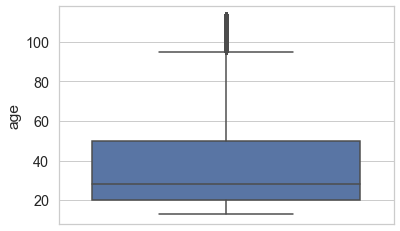

In [11]:
sns.boxplot(y="age",data=upd_fb_df)

**Handling Outliers in Age**

In [12]:
#function to remove outliers if any
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [13]:
lowage,highage=remove_outlier(upd_fb_df['age'])
upd_fb_df['age']=np.where(upd_fb_df['age']>highage,highage,upd_fb_df['age'])
upd_fb_df['age']=np.where(upd_fb_df['age']<lowage,lowage,upd_fb_df['age'])
upd_fb_df['age']=upd_fb_df['age'].astype('int64')

<AxesSubplot:ylabel='age'>

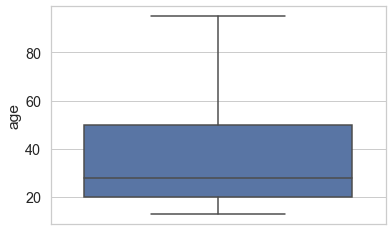

In [14]:
sns.boxplot(y="age",data=upd_fb_df)

**Exploratory Data Analysis**

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

**Creating Label for Age Group**

In [16]:
upd_fb_df['age_group']=pd.cut(upd_fb_df['age'].dropna(),[10,20,30,40,50,60,70,80,90,100], labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'], include_lowest=True)

**Analysis based on Users Gender Ratio**

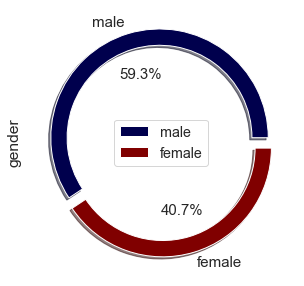

In [17]:
upd_fb_df['gender'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=15, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, legend=True, 
                                               wedgeprops=dict(width=0.15), cmap='seismic')
plt.legend(loc='center')
plt.show()

**Analysis of Users Age Group Ratio**

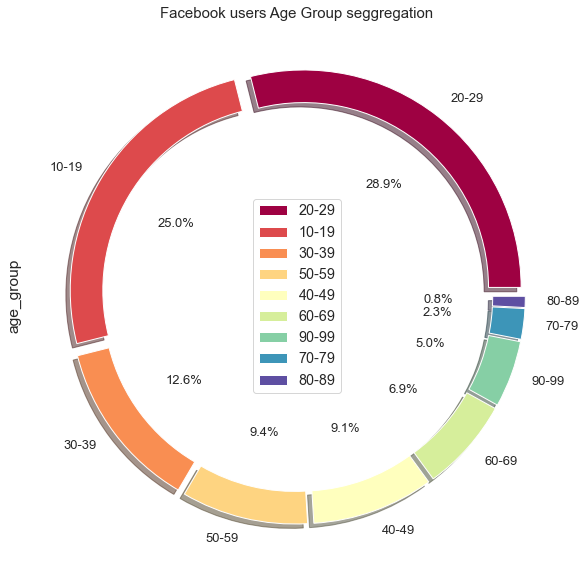

In [18]:
upd_fb_df['age_group'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],                                             
                                           fontsize=13, autopct='%3.1f%%', figsize=(10,10), shadow=True,  
                                           legend=True, cmap='Spectral',wedgeprops=dict(width=0.15))
plt.legend(loc='center')
plt.title('Facebook users Age Group seggregation',fontsize=15)
plt.show()

**Analysis of Age Group Vs Gender**

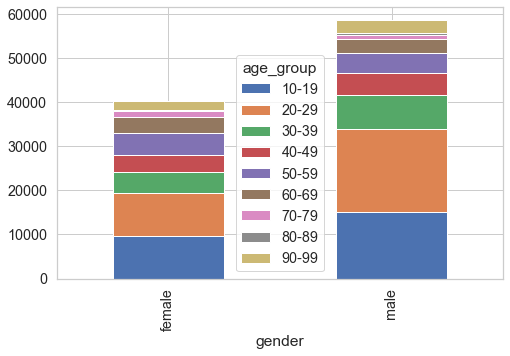

In [19]:
age_gender = upd_fb_df.groupby(['age_group', 'gender'])['gender'].count().unstack('age_group').fillna(0)
age_gender.plot(kind="bar",stacked=True)
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

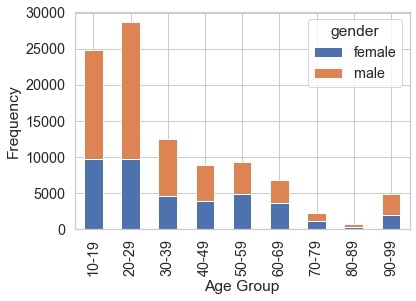

In [20]:
age_gender = upd_fb_df.groupby(['age_group', 'gender'])['age_group'].count().unstack('gender').fillna(0)
age_gender.plot(kind="bar",stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()

**Analysis of Friends Count Vs Friend Requests Initiated**

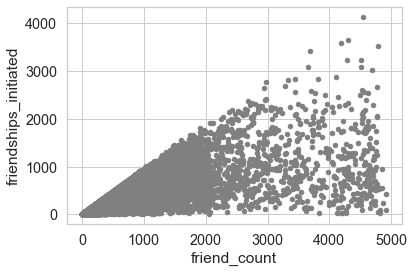

In [21]:
upd_fb_df.plot(kind='scatter',x='friend_count',y='friendships_initiated',color='Grey')
plt.show()

**Analysis of Friends Count Vs Friends Request initiated based on Age Group**

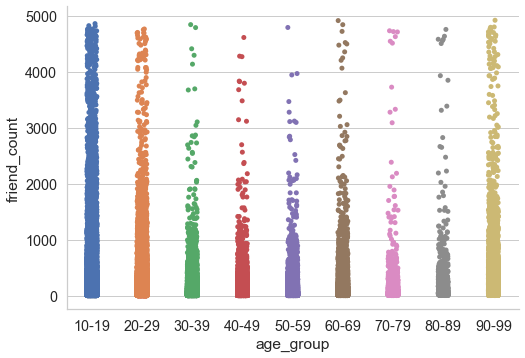

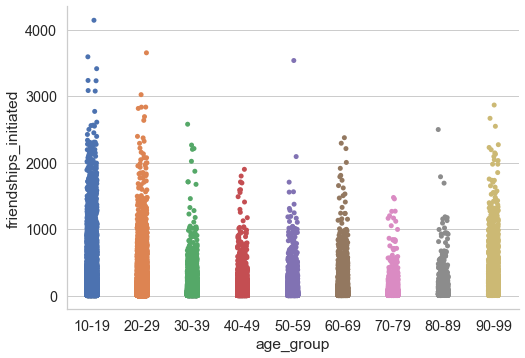

In [22]:
sns.catplot(x="age_group", y="friend_count", data=upd_fb_df)
fig=plt.gcf()
fig.set_size_inches(8,5)
sns.catplot(x="age_group", y="friendships_initiated", data=upd_fb_df)
fig=plt.gcf()
fig.set_size_inches(8,5)

**Analysis of Likes Vs Likes Received**

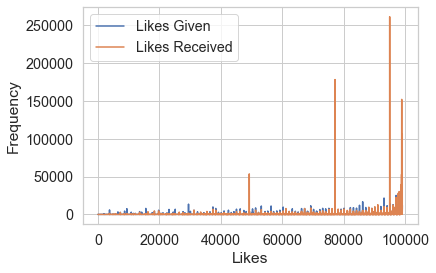

In [23]:
sns.lineplot(data=upd_fb_df['likes'], label="Likes Given")
sns.lineplot(data=upd_fb_df['likes_received'], label="Likes Received")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()

**Analysis of Likes Given/Received from Browser/Mobile App based on Age Group**

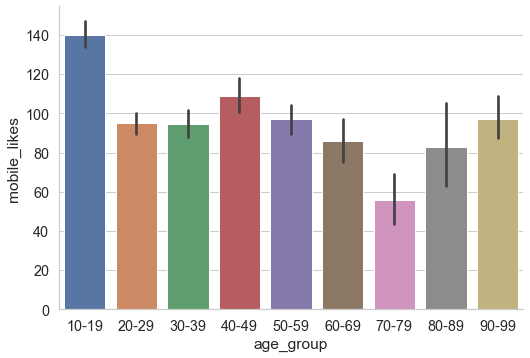

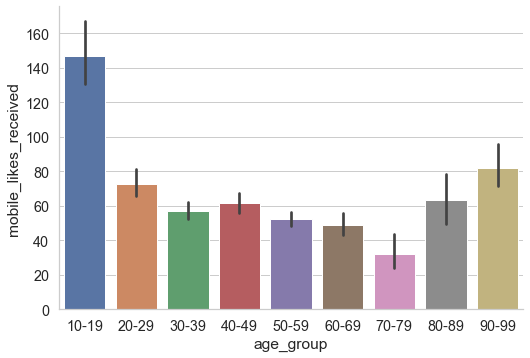

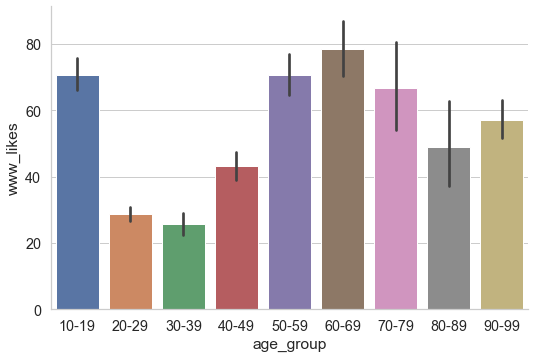

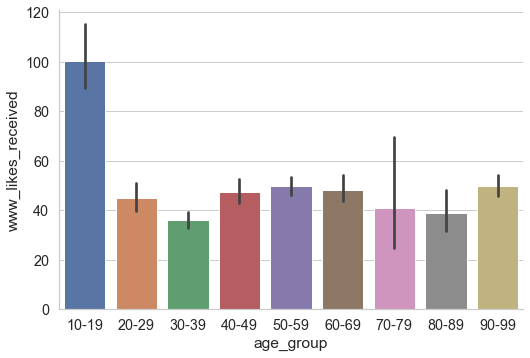

In [24]:
#Scatter Plot to show count of Mobile Likes Given based on age group
sns.catplot(x="age_group", y="mobile_likes", data=upd_fb_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(8,5)
#Scatter Plot to show count of Mobile Likes Received based on age group
sns.catplot(x="age_group", y="mobile_likes_received", data=upd_fb_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(8,5)
#Scatter Plot to show count of Web Likes Given based on age group
sns.catplot(x="age_group", y="www_likes", data=upd_fb_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(8,5)
#Scatter Plot to show count of Web Likes Received based on age group
sns.catplot(x="age_group", y="www_likes_received", data=upd_fb_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

**Analysis of Friends Count Vs Friend Requests initiated based on Gender**

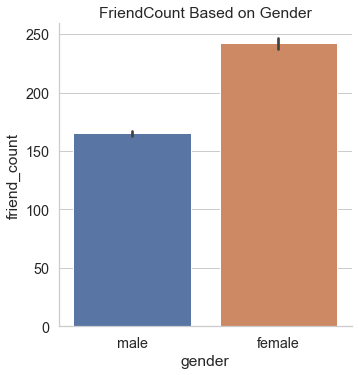

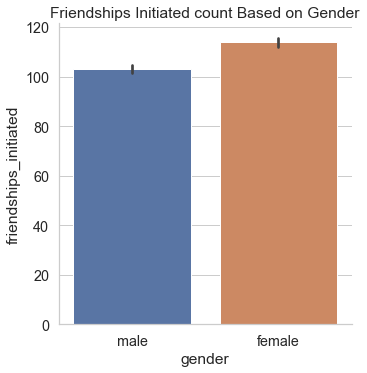

In [25]:
sns.catplot(x="gender", y="friend_count", data=upd_fb_df,kind='bar')
plt.title("FriendCount Based on Gender")
sns.catplot(x="gender", y="friendships_initiated", data=upd_fb_df,kind='bar')
plt.title("Friendships Initiated count Based on Gender")
plt.show()

**Analysis of Likes Given via Browser/Mobile App**

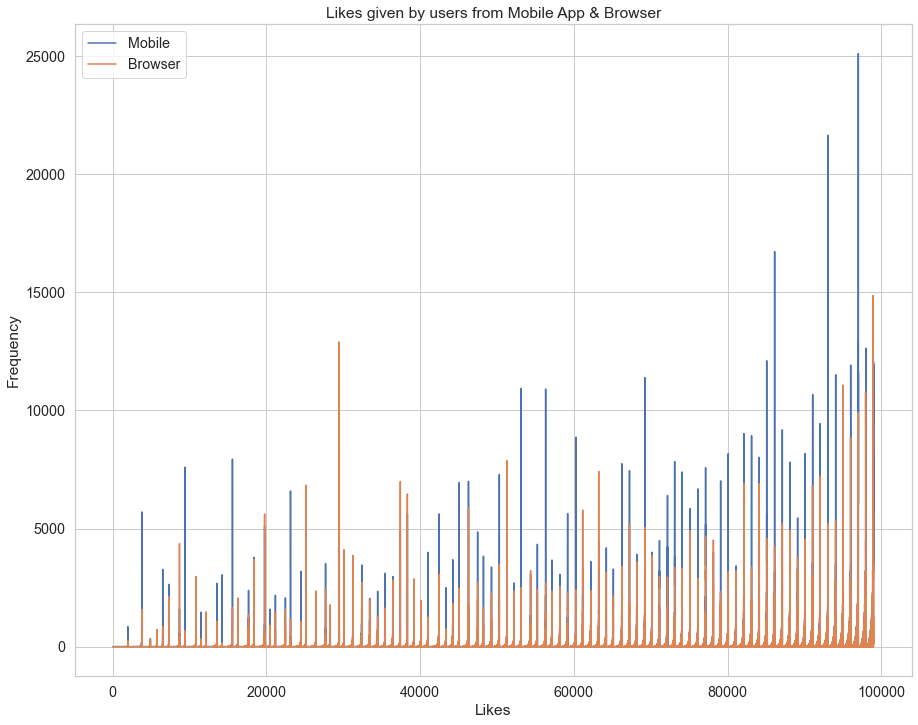

In [26]:
sns.lineplot(data=upd_fb_df['mobile_likes'], label="Mobile")
sns.lineplot(data=upd_fb_df['www_likes'], label="Browser")
plt.title("Likes given by users from Mobile App & Browser")
plt.xlabel("Likes")
plt.ylabel("Frequency")
fig=plt.gcf()
fig.set_size_inches(15,12)

**Analysis of Likes Received via Browser/Mobile App**

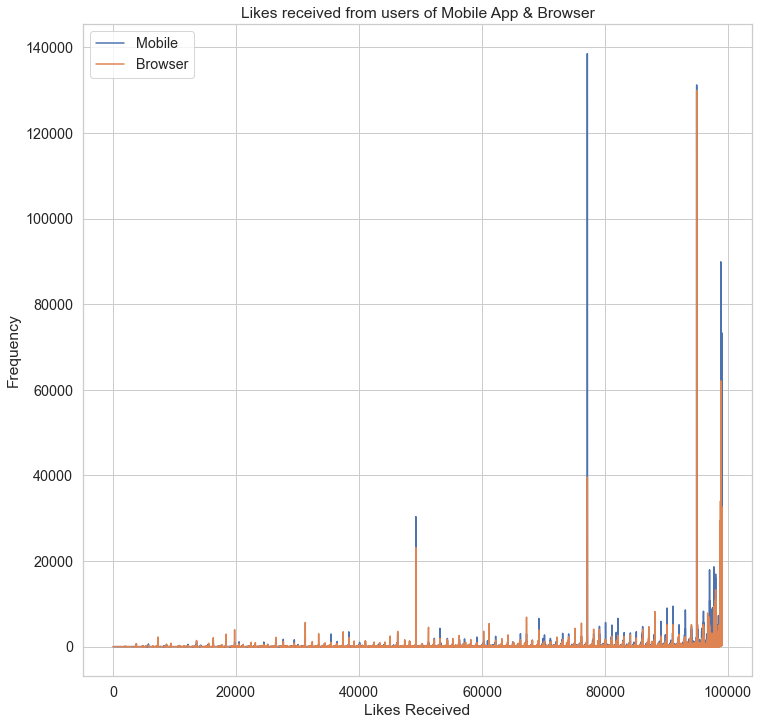

In [27]:
sns.lineplot(data=upd_fb_df['mobile_likes_received'], label="Mobile")
sns.lineplot(data=upd_fb_df['www_likes_received'], label="Browser")
plt.title("Likes received from users of Mobile App & Browser")
plt.xlabel("Likes Received")
plt.ylabel("Frequency")
plt.legend(loc="upper left")
fig=plt.gcf()
fig.set_size_inches(12,12)

**Analysis of Mobile App usage**

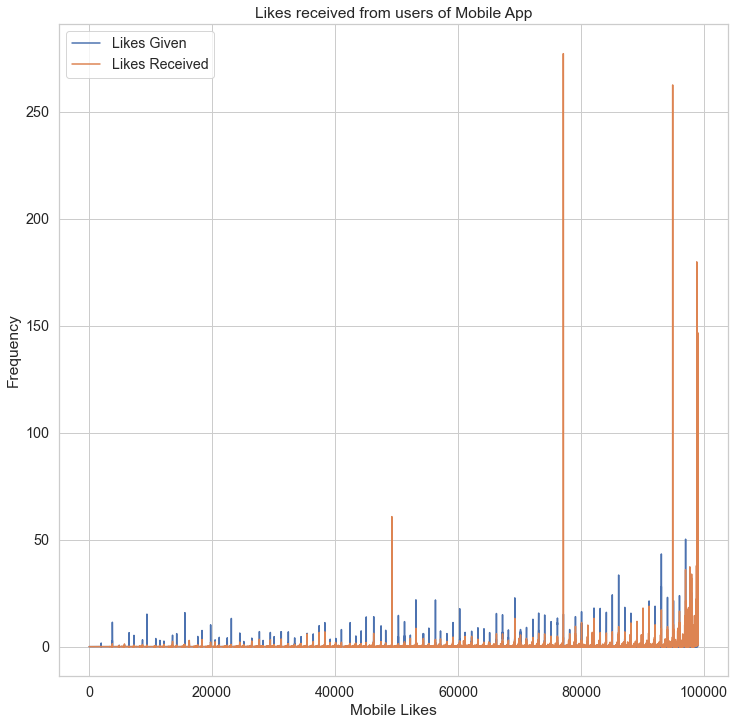

In [28]:
sns.lineplot(data=upd_fb_df['mobile_likes']/500, label="Likes Given")
sns.lineplot(data=upd_fb_df['mobile_likes_received']/500, label="Likes Received")
plt.title("Likes received from users of Mobile App")
plt.xlabel("Mobile Likes")
plt.ylabel("Frequency")
plt.legend(loc="upper left")
fig=plt.gcf()
fig.set_size_inches(12,12)

**Analysis of Browser usage**

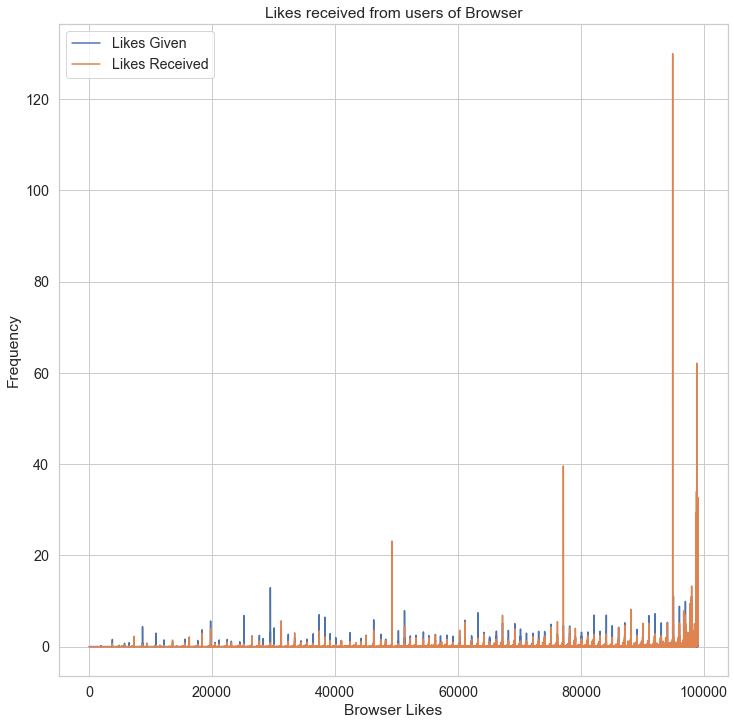

In [29]:
sns.lineplot(data=upd_fb_df['www_likes']/1000, label="Likes Given")
sns.lineplot(data=upd_fb_df['www_likes_received']/1000, label="Likes Received")
plt.title("Likes received from users of Browser")
plt.xlabel("Browser Likes")
plt.ylabel("Frequency")
fig=plt.gcf()
fig.set_size_inches(12,12)

**Analysis of Tenure Vs Gender & AgeGroup**

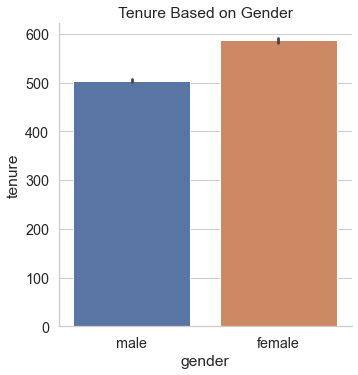

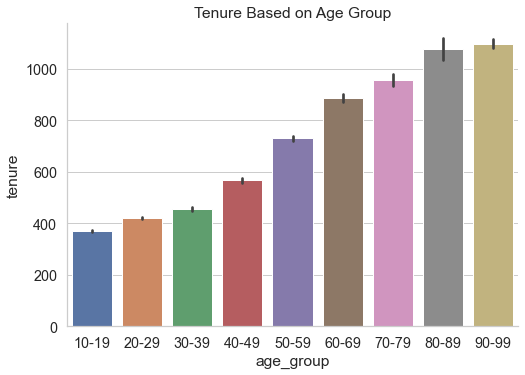

In [30]:
sns.catplot(x="gender", y="tenure", data=upd_fb_df,kind='bar')
plt.title("Tenure Based on Gender")
sns.catplot(x="age_group", y="tenure", data=upd_fb_df,kind='bar')
plt.title("Tenure Based on Age Group")
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

**Analysis of Likes Vs Likes Received based on Gender**

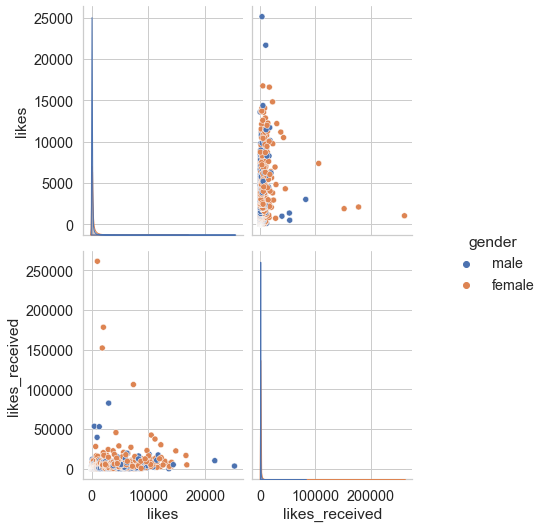

In [31]:
likes = upd_fb_df[['likes','likes_received','gender']]
sns.pairplot(likes, hue="gender")
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

**Analysis of Likes Vs Likes Received based on Age Group**

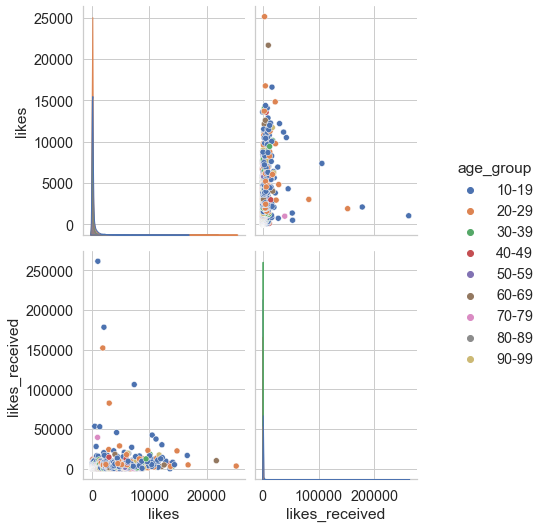

In [32]:
likes = upd_fb_df[['likes','likes_received','age_group']]
sns.pairplot(likes, hue="age_group")
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

**Friends Count & Friendships Initiated based on Age Group**

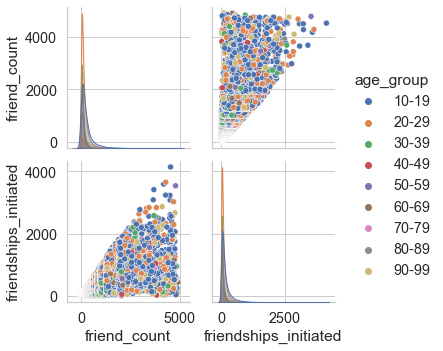

In [33]:
likes = upd_fb_df[['friend_count','friendships_initiated','age_group']]
sns.pairplot(likes, hue="age_group")
plt.show()

**Friends Count & Friendships Initiated based on Gender**

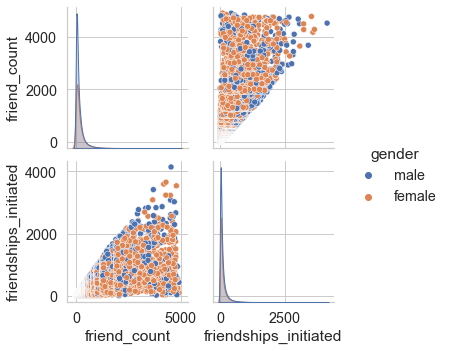

In [34]:
likes = upd_fb_df[['friend_count','friendships_initiated','gender']]
sns.pairplot(likes, hue="gender")
plt.show()

**Correlation between numerical variables**

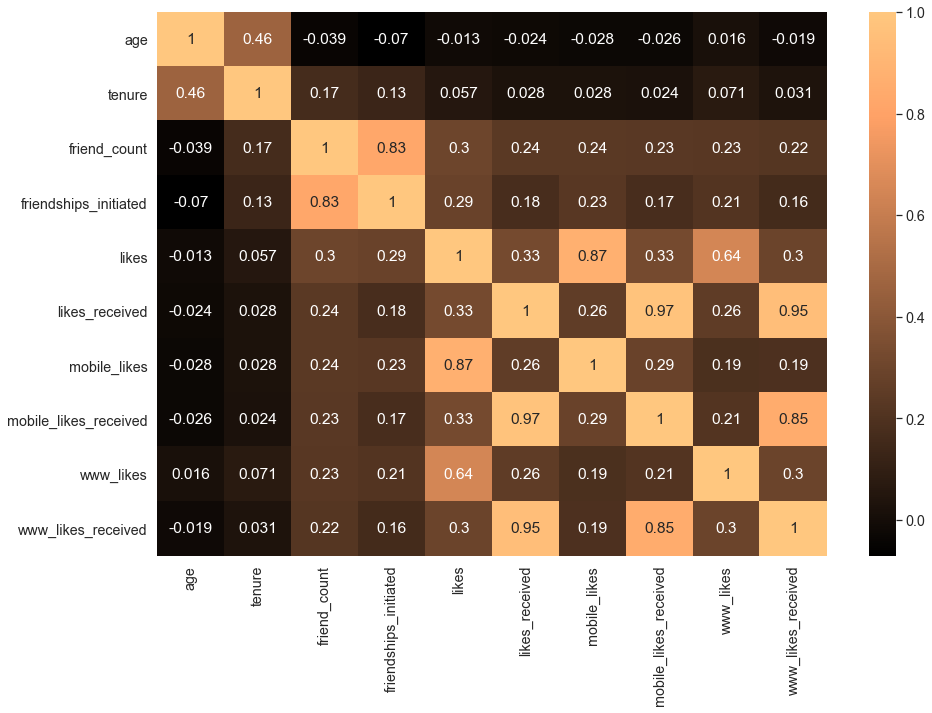

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(upd_fb_df.corr(), annot=True,cmap='copper')
plt.show()